In [5]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

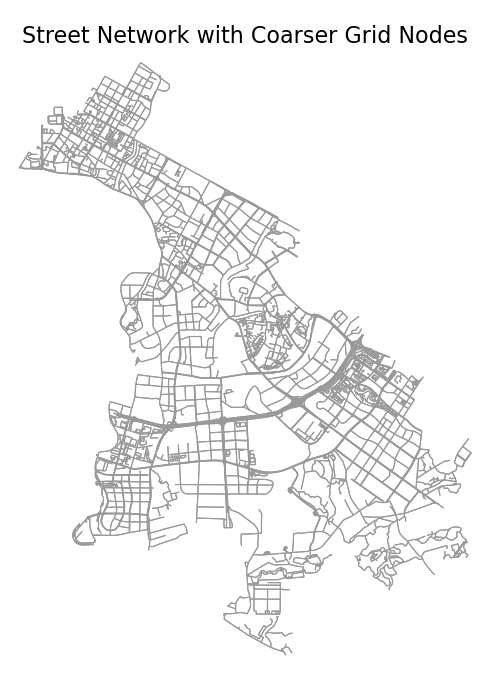

In [2]:
import osmnx as ox
import networkx as nx
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
import warnings

# Define the area of interest
place_name = "Jinjiang District, Chengdu, China"

# Load the graph from a GraphML file
G = ox.load_graphml(filepath="chengdu_network.graphml")

# Project the graph to UTM for accurate distance calculations
G_proj = ox.project_graph(G)

# Get the boundary of the specified area
boundary = ox.geocode_to_gdf(place_name).geometry[0]

# Increase grid size to reduce granularity
grid_size = 1000  # Grid size in meters (1 km)

# Get bounding box of the area
x_min, y_min, x_max, y_max = boundary.bounds

# Generate a coarser grid of points within the boundary
x_vals = np.arange(x_min, x_max, grid_size)
y_vals = np.arange(y_min, y_max, grid_size)

# Create grid points within the boundary
grid_points = [Point(x, y) for x in x_vals for y in y_vals if boundary.contains(Point(x, y))]

# Snap grid points to the nearest network nodes
grid_nodes = [ox.nearest_nodes(G_proj, point.x, point.y) for point in grid_points]

# Plot the graph with customized settings
fig, ax = ox.plot_graph(
    G_proj,
    node_size=0,
    edge_color='#999999',
    edge_linewidth=0.8,
    bgcolor='white',
    show=False,
    close=False
)

# Plot the grid nodes on top of the graph
x_coords = [G_proj.nodes[node]['x'] for node in grid_nodes]
y_coords = [G_proj.nodes[node]['y'] for node in grid_nodes]

ax.set_title("Street Network with Coarser Grid Nodes", fontsize=16)

# Show the final plot
plt.show()

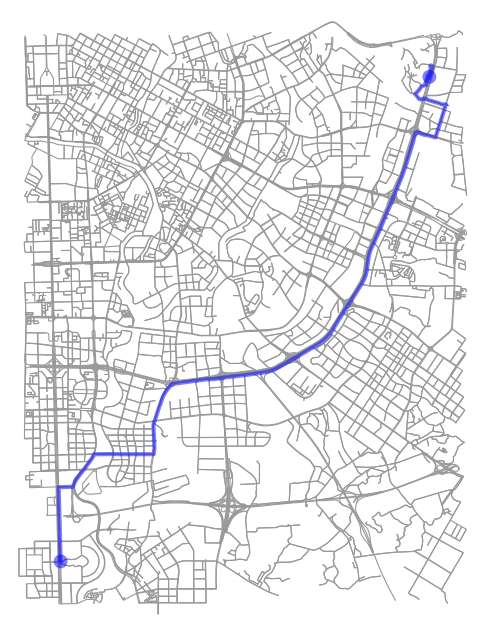

In [45]:
import osmnx as ox
import networkx as nx
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive')

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path avoiding penalized edges
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Plot the route on the graph
    fig, ax = ox.plot_graph_route(
        G,
        route,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        route_color='blue',
        route_linewidth=3,
        bgcolor='white'
    )
else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


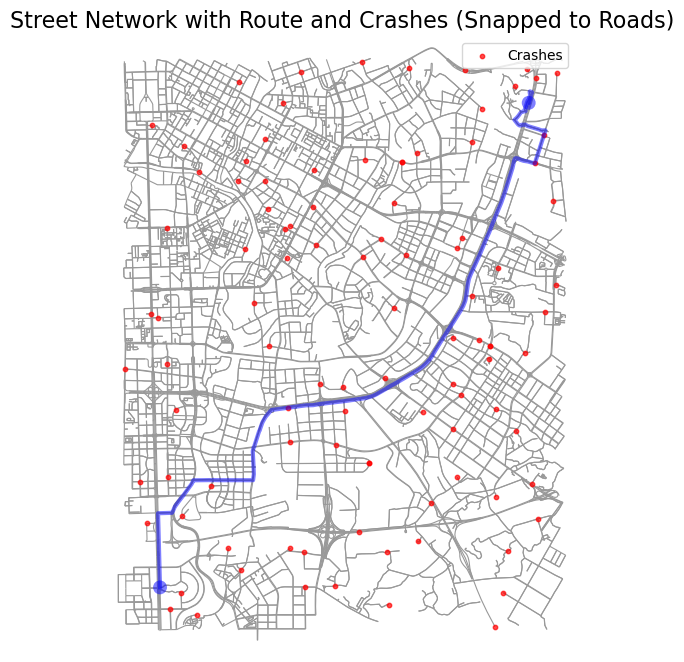

In [46]:
import osmnx as ox
import networkx as nx
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive')

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path avoiding penalized edges
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate random crash points within the bounding box
    num_crashes = 100
    crash_lats = np.random.uniform(bbox[0], bbox[2], num_crashes)
    crash_lons = np.random.uniform(bbox[1], bbox[3], num_crashes)

    # Create a list of crash points as (lat, lon)
    crash_points = [(lat, lon) for lat, lon in zip(crash_lats, crash_lons)]

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Plot the graph and route
    fig, ax = ox.plot_graph_route(
        G,
        route,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        route_color='blue',
        route_linewidth=3,
        bgcolor='white',
        show=False,
        close=False
    )

    # Overlay crash points snapped to the network
    ax.scatter(crash_x, crash_y, c='red', s=10, alpha=0.7, label='Crashes')

    # Set title and show legend
    ax.set_title("Street Network with Route and Crashes (Snapped to Roads)", fontsize=16)
    ax.legend(loc='upper right')

    # Show the final plot
    plt.show()

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


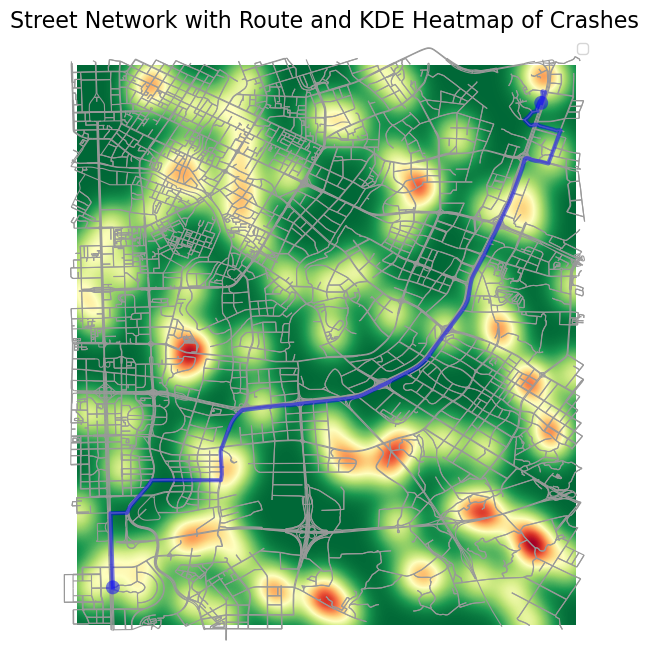

In [60]:
import osmnx as ox
import networkx as nx
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
np.random.seed(42)

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive')

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path avoiding penalized edges
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate random crash points within the bounding box
    num_crashes = 100
    crash_lats = np.random.uniform(bbox[0], bbox[2], num_crashes)
    crash_lons = np.random.uniform(bbox[1], bbox[3], num_crashes)

    # Create a list of crash points as (lat, lon)
    crash_points = [(lat, lon) for lat, lon in zip(crash_lats, crash_lons)]

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Apply Kernel Density Estimation (KDE)
    xy = np.vstack([crash_x, crash_y])
    kde = gaussian_kde(xy, bw_method=0.1)  # Adjust bw_method for smoother or sharper density
    x_min, x_max = min(crash_x), max(crash_x)
    y_min, y_max = min(crash_y), max(crash_y)

    # Create a grid for KDE heatmap
    x_grid = np.linspace(x_min, x_max, 500)
    y_grid = np.linspace(y_min, y_max, 500)
    X, Y = np.meshgrid(x_grid, y_grid)
    Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    # Plot the graph and route
    fig, ax = ox.plot_graph_route(
        G,
        route,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        route_color='blue',
        route_linewidth=3,
        bgcolor='white',
        show=False,
        close=False
    )

    # Overlay the KDE heatmap
    ax.imshow(
        Z,
        extent=[x_min, x_max, y_min, y_max],
        origin='lower',
        cmap='RdYlGn_r',  # Green to red gradient
        alpha=1
    )

    # Overlay crash points (snapped to the network)
    # ax.scatter(crash_x, crash_y, c='red', s=10, alpha=0.7, label='Crashes')

    # Set title and show legend
    ax.set_title("Street Network with Route and KDE Heatmap of Crashes", fontsize=16)
    ax.legend(loc='upper right')

    # Show the final plot
    plt.show()

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


In [19]:
import geopandas as gpd
from shapely.geometry import LineString

# Create a LineString from the route coordinates in (longitude, latitude) format
route_coords = [(G_proj.nodes[node]['x'], G_proj.nodes[node]['y']) for node in route]
route_line = LineString(route_coords).simplify(tolerance=10)

# Create a GeoDataFrame with the LineString
route_gdf = gpd.GeoDataFrame(geometry=[route_line], crs=G_proj.graph.get('crs'))

# Transform to WGS84 if not already in WGS84
if route_gdf.crs is not None and route_gdf.crs.to_string() != 'EPSG:4326':
    route_gdf = route_gdf.to_crs(epsg=4326)

# Save to GeoJSON
route_gdf.to_file('/Users/nicholas/Desktop/map/public/optimal_route.geojson', driver='GeoJSON')

print("GeoJSON file 'optimal_route.geojson' has been saved successfully.")


GeoJSON file 'optimal_route.geojson' has been saved successfully.


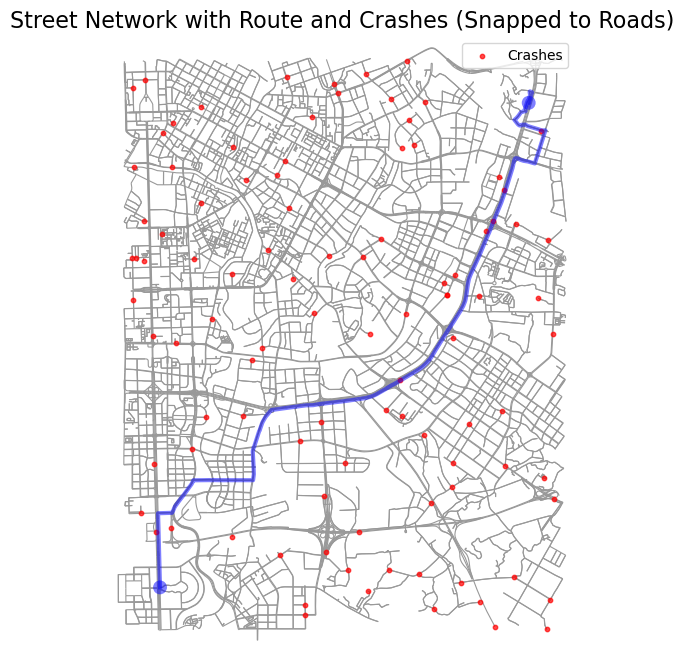

Edges with crash severity:
Edge (436884087, 3214480428, 0) has cumulative severity: 1
Edge (436912759, 7686171619, 0) has cumulative severity: 1
Edge (503861693, 7273900835, 0) has cumulative severity: 1
Edge (660131733, 11564566521, 0) has cumulative severity: 1
Edge (660131738, 8353679904, 0) has cumulative severity: 1
Edge (1159131046, 2823785843, 0) has cumulative severity: 1
Edge (1305816697, 1964418552, 0) has cumulative severity: 1
Edge (1425996106, 4637576793, 0) has cumulative severity: 1
Edge (1445528674, 11736786356, 0) has cumulative severity: 1
Edge (1469156341, 1159155384, 0) has cumulative severity: 1
Edge (1469172045, 2211339987, 0) has cumulative severity: 1
Edge (1469184059, 1469187586, 0) has cumulative severity: 1
Edge (1493095146, 7813563737, 0) has cumulative severity: 1
Edge (1819305209, 1912247131, 0) has cumulative severity: 1
Edge (2081779230, 3015893435, 0) has cumulative severity: 2
Edge (2082828900, 3028598358, 0) has cumulative severity: 1
Edge (2133206765

In [61]:
import osmnx as ox
import networkx as nx
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive')

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path avoiding penalized edges
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate random crash points within the bounding box
    num_crashes = 100
    crash_lats = np.random.uniform(bbox[0], bbox[2], num_crashes)
    crash_lons = np.random.uniform(bbox[1], bbox[3], num_crashes)

    # Create a list of crash points as (lat, lon)
    crash_points = [(lat, lon) for lat, lon in zip(crash_lats, crash_lons)]

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Find the nearest edge for each crash point and tally crashes to the nearest edge
    edge_crash_count = defaultdict(int)  # Dictionary to store crash counts per edge
    for lat, lon in crash_points:
        nearest_edge = ox.nearest_edges(G, lon, lat)
        edge_crash_count[nearest_edge] += 1

    # Add cumulative severity to the edges in the graph
    for u, v, key in G.edges(keys=True):
        G[u][v][key]['cumulative_severity'] = edge_crash_count.get((u, v, key), 0)

    # Plot the graph and route
    fig, ax = ox.plot_graph_route(
        G,
        route,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        route_color='blue',
        route_linewidth=3,
        bgcolor='white',
        show=False,
        close=False
    )

    # Overlay crash points snapped to the network
    ax.scatter(crash_x, crash_y, c='red', s=10, alpha=0.7, label='Crashes')

    # Set title and show legend
    ax.set_title("Street Network with Route and Crashes (Snapped to Roads)", fontsize=16)
    ax.legend(loc='upper right')

    # Show the final plot
    plt.show()

    # Print a summary of edges with crash severity
    edge_severity_summary = [(u, v, key, data['cumulative_severity']) 
                             for u, v, key, data in G.edges(keys=True, data=True) if data['cumulative_severity'] > 0]

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


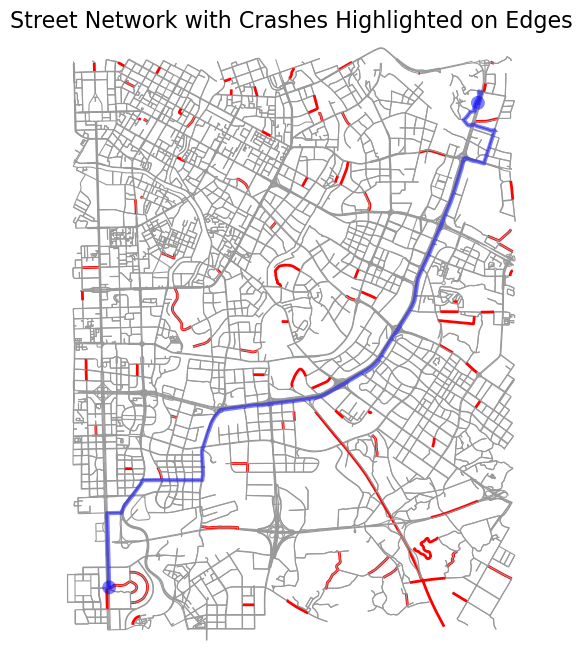

In [62]:
import osmnx as ox
import networkx as nx
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive')

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path avoiding penalized edges
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate random crash points within the bounding box
    num_crashes = 100
    crash_lats = np.random.uniform(bbox[0], bbox[2], num_crashes)
    crash_lons = np.random.uniform(bbox[1], bbox[3], num_crashes)

    # Create a list of crash points as (lat, lon)
    crash_points = [(lat, lon) for lat, lon in zip(crash_lats, crash_lons)]

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Find the nearest edge for each crash point and tally crashes to the nearest edge
    edge_crash_count = defaultdict(int)  # Dictionary to store crash counts per edge
    for lat, lon in crash_points:
        nearest_edge = ox.nearest_edges(G, lon, lat)
        edge_crash_count[nearest_edge] += 1

    # Add cumulative severity to the edges in the graph
    for u, v, key in G.edges(keys=True):
        G[u][v][key]['cumulative_severity'] = edge_crash_count.get((u, v, key), 0)

    # Define edge colors based on crash severity
    edge_colors = [
        'red' if G[u][v][key]['cumulative_severity'] > 0 else '#999999'  # Gray for no crashes
        for u, v, key in G.edges(keys=True)
    ]

    # Define edge widths based on crash severity
    edge_widths = [
        2 if G[u][v][key]['cumulative_severity'] > 0 else 0.8
        for u, v, key in G.edges(keys=True)
    ]

    # Plot the graph with customized edge colors and widths
    fig, ax = ox.plot_graph(
        G,
        node_size=0,
        edge_color=edge_colors,
        edge_linewidth=edge_widths,
        bgcolor='white',
        show=False,
        close=False
    )

    # Plot the route on top
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=ax,
        show=False,
        close=False
    )

    # Set the title
    ax.set_title("Street Network with Crashes Highlighted on Edges", fontsize=16)

    # Show the final plot
    plt.show()

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


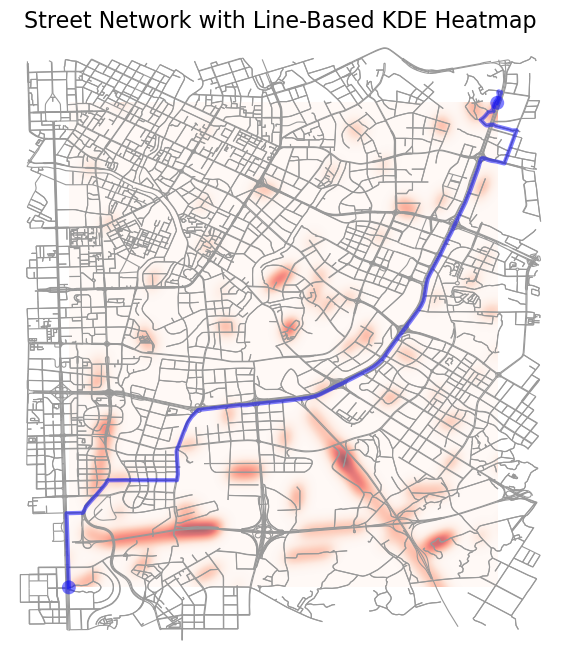

In [63]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive')

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path avoiding penalized edges
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate random crash points within the bounding box
    num_crashes = 100
    crash_lats = np.random.uniform(bbox[0], bbox[2], num_crashes)
    crash_lons = np.random.uniform(bbox[1], bbox[3], num_crashes)

    # Create a list of crash points as (lat, lon)
    crash_points = [(lat, lon) for lat, lon in zip(crash_lats, crash_lons)]

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Find the nearest edge for each crash point and tally crashes to the nearest edge
    edge_crash_count = defaultdict(int)  # Dictionary to store crash counts per edge
    for lat, lon in crash_points:
        nearest_edge = ox.nearest_edges(G, lon, lat)
        edge_crash_count[nearest_edge] += 1

    # Add cumulative severity to the edges in the graph
    for u, v, key in G.edges(keys=True):
        G[u][v][key]['cumulative_severity'] = edge_crash_count.get((u, v, key), 0)

    # Create points along edges with crash severity for the heatmap
    line_points = []
    for u, v, key, data in G.edges(keys=True, data=True):
        if data['cumulative_severity'] > 0:
            # Get the coordinates of the edge endpoints
            x_start, y_start = G.nodes[u]['x'], G.nodes[u]['y']
            x_end, y_end = G.nodes[v]['x'], G.nodes[v]['y']

            # Calculate the number of intermediate points based on the edge length
            num_points = max(int(data['length'] / 10), 2)  # At least 2 points, more for longer edges
            x_vals = np.linspace(x_start, x_end, num_points)
            y_vals = np.linspace(y_start, y_end, num_points)

            # Add the intermediate points to the list, weighted by crash severity
            line_points.extend([(x, y) for x, y in zip(x_vals, y_vals)])

    # Apply Kernel Density Estimation (KDE) to line points
    line_points = np.array(line_points).T
    kde = gaussian_kde(line_points, bw_method=0.05)  # Adjust bw_method for smoother or sharper density
    x_min, x_max = G.nodes[orig_node]['x'], G.nodes[dest_node]['x']
    y_min, y_max = G.nodes[orig_node]['y'], G.nodes[dest_node]['y']

    # Create a grid for the KDE heatmap
    x_grid = np.linspace(x_min, x_max, 500)
    y_grid = np.linspace(y_min, y_max, 500)
    X, Y = np.meshgrid(x_grid, y_grid)
    Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

    # Plot the graph with KDE heatmap
    fig, ax = ox.plot_graph(
        G,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        bgcolor='white',
        show=False,
        close=False
    )

    # Overlay the KDE heatmap
    ax.imshow(
        Z,
        extent=[x_min, x_max, y_min, y_max],
        origin='lower',
        cmap='Reds',  # White to red gradient
        alpha=0.6
    )

    # Plot the route on top
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=ax,
        show=False,
        close=False
    )

    # Set the title
    ax.set_title("Street Network with Line-Based KDE Heatmap", fontsize=16)

    # Show the final plot
    plt.show()

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")


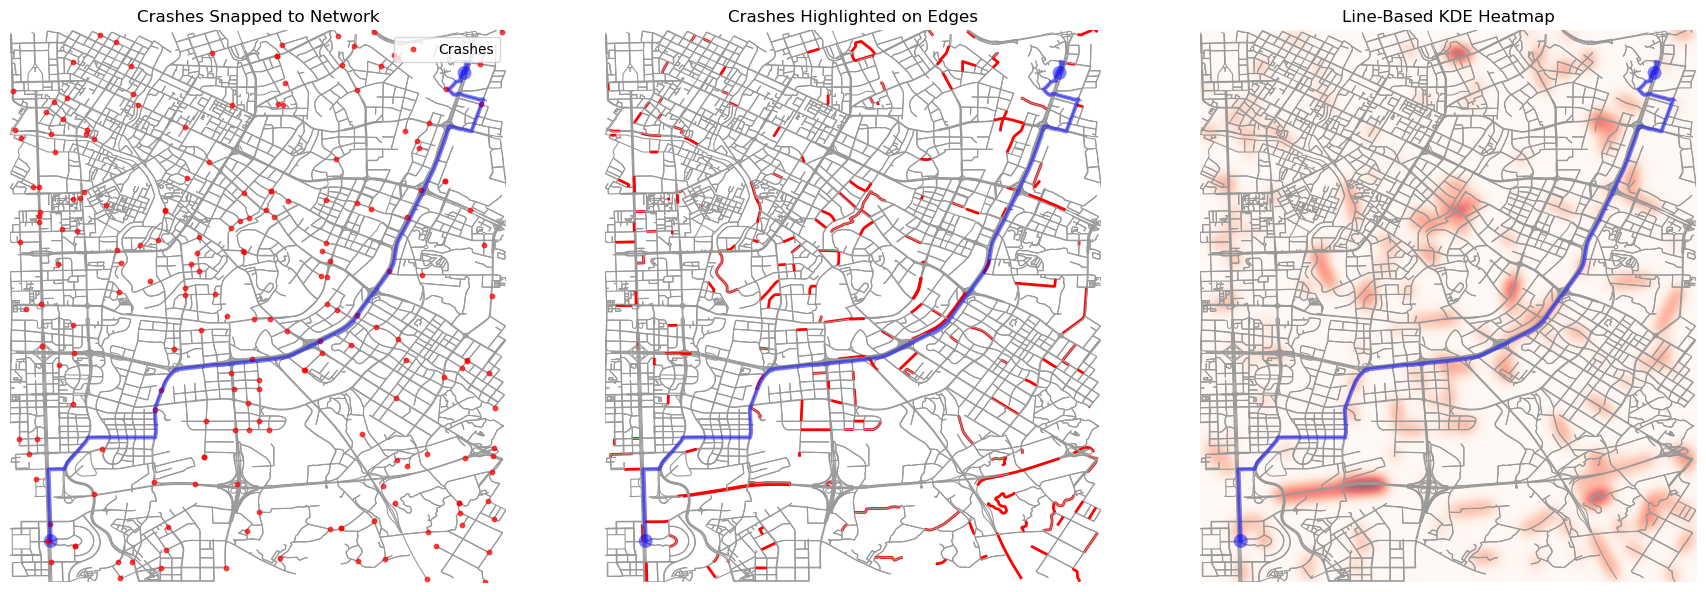

In [67]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from collections import defaultdict
from scipy.stats import gaussian_kde

# Define the area of interest using the bounding box (bbox)
bbox = (30.5493864, 104.057658, 30.6724752, 104.1682525)

# Load the street network within the bounding box
G = ox.graph_from_bbox(
    north=bbox[2], south=bbox[0], east=bbox[3], west=bbox[1], network_type='drive'
)

# Define starting and ending points (ensure they're different)
orig_point = (30.5593864, 104.067658)  # Near the bottom-left of bbox
dest_point = (30.6624752, 104.1582525)  # Near the top-right of bbox

# Find the nearest network nodes to the origin and destination points
orig_node = ox.nearest_nodes(G, orig_point[1], orig_point[0])
dest_node = ox.nearest_nodes(G, dest_point[1], dest_point[0])

# Compute the shortest path
if orig_node != dest_node:
    route = nx.shortest_path(G, orig_node, dest_node, weight='length')

    # Generate random crash points within the bounding box
    num_crashes = 200
    crash_lats = np.random.uniform(bbox[0], bbox[2], num_crashes)
    crash_lons = np.random.uniform(bbox[1], bbox[3], num_crashes)

    # Create a list of crash points as (lat, lon)
    crash_points = list(zip(crash_lats, crash_lons))

    # Snap crash points to the nearest network nodes
    crash_nodes = [ox.nearest_nodes(G, lon, lat) for lat, lon in crash_points]

    # Get coordinates of snapped crash nodes
    crash_x = [G.nodes[node]['x'] for node in crash_nodes]
    crash_y = [G.nodes[node]['y'] for node in crash_nodes]

    # Find the nearest edge for each crash point and tally crashes to the nearest edge
    edge_crash_count = defaultdict(int)
    for lat, lon in crash_points:
        nearest_edge = ox.nearest_edges(G, lon, lat)
        edge_crash_count[nearest_edge] += 1

    # Add cumulative severity to the edges in the graph
    for u, v, key in G.edges(keys=True):
        G[u][v][key]['cumulative_severity'] = edge_crash_count.get((u, v, key), 0)

    # Prepare edge colors and widths for plotting
    edge_colors = []
    edge_widths = []
    for u, v, key in G.edges(keys=True):
        severity = G[u][v][key]['cumulative_severity']
        if severity > 0:
            edge_colors.append('red')
            edge_widths.append(2)
        else:
            edge_colors.append('#999999')
            edge_widths.append(0.8)

    # Create points along edges with crash severity for the heatmap
    line_points = []
    for u, v, key, data in G.edges(keys=True, data=True):
        if data['cumulative_severity'] > 0:
            x_start, y_start = G.nodes[u]['x'], G.nodes[u]['y']
            x_end, y_end = G.nodes[v]['x'], G.nodes[v]['y']
            num_points = max(int(data['length'] / 10), 2)
            x_vals = np.linspace(x_start, x_end, num_points)
            y_vals = np.linspace(y_start, y_end, num_points)
            line_points.extend([(x, y) for x, y in zip(x_vals, y_vals)])

    # Apply Kernel Density Estimation (KDE) to line points
    if line_points:
        line_points = np.array(line_points).T
        kde = gaussian_kde(line_points, bw_method=0.05)
        x_coords = [G.nodes[node]['x'] for node in G.nodes()]
        y_coords = [G.nodes[node]['y'] for node in G.nodes()]
        x_min, x_max = min(x_coords), max(x_coords)
        y_min, y_max = min(y_coords), max(y_coords)
        x_grid = np.linspace(x_min, x_max, 500)
        y_grid = np.linspace(y_min, y_max, 500)
        X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
        Z = kde(np.vstack([X_grid.ravel(), Y_grid.ravel()])).reshape(X_grid.shape)
    else:
        Z = None

    # Create a figure with 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # First subplot: Street Network with Route and Crashes
    # Plot the street network
    ox.plot_graph(
        G,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[0]
    )
    # Overlay the route
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[0],
        show=False,
        close=False
    )
    # Overlay crash points snapped to the network
    axs[0].scatter(crash_x, crash_y, c='red', s=10, alpha=0.7, label='Crashes')
    axs[0].set_title("Crashes Snapped to Network", fontsize=12)
    axs[0].legend(loc='upper right')

    # Second subplot: Street Network with Crashes Highlighted on Edges
    ox.plot_graph(
        G,
        node_size=0,
        edge_color=edge_colors,
        edge_linewidth=edge_widths,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[1]
    )
    # Plot the route on top
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[1],
        show=False,
        close=False
    )
    axs[1].set_title("Crashes Highlighted on Edges", fontsize=12)

    # Third subplot: Street Network with Line-Based KDE Heatmap
    ox.plot_graph(
        G,
        node_size=0,
        edge_color='#999999',
        edge_linewidth=0.8,
        bgcolor='white',
        show=False,
        close=False,
        ax=axs[2]
    )

    if Z is not None:
        axs[2].imshow(
            np.flipud(Z),
            extent=[x_min, x_max, y_min, y_max],
            cmap='RdYlGn_r',
            alpha=0.6
        )
    # Plot the route on top
    ox.plot_graph_route(
        G,
        route,
        route_color='blue',
        route_linewidth=3,
        node_size=0,
        bgcolor=None,
        ax=axs[2],
        show=False,
        close=False
    )
    axs[2].set_title("Line-Based KDE Heatmap", fontsize=12)

    # Set the same x and y limits and aspect ratio for all subplots
    for ax in axs:
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_aspect('equal')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

else:
    print("Origin and destination nodes are the same; please choose different coordinates.")